# Data Visualization

#### Imports

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import joypy
from matplotlib import cm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import squarify
import matplotlib
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Nivell 1

### Execise 1 - Examining data

#### 1. Import of dataset

In [2]:
#Import and show some rows
df = pd.read_csv('tips.csv')
df.sample(4)

,total_bill,tip,sex,smoker,day,time,size
238,35.83,4.67,Female,No,Sat,Dinner,3
12,15.42,1.57,Male,No,Sun,Dinner,2
185,20.69,5.00,Male,No,Sun,Dinner,5
97,12.03,1.50,Male,Yes,Fri,Dinner,2


In [4]:
#Show info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
#check if there are any nan values
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Dataset has 244 entries and no nan values.

#### 2. New column for percentage of tip from the total bill

In [6]:
#Create new column - the tip is normally considered voluntary and each client gives some percentage of his/her total bill
df['tip_pct'] = round((df['tip']*100)/df['total_bill'])
df.sample(4)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
149,7.51,2.00,Male,No,Thur,Lunch,2,27.0
174,16.82,4.00,Male,Yes,Sun,Dinner,2,24.0
168,10.59,1.61,Female,Yes,Sat,Dinner,2,15.0
20,17.92,4.08,Male,No,Sat,Dinner,2,23.0


#### 3. Frequency of some amount of tip

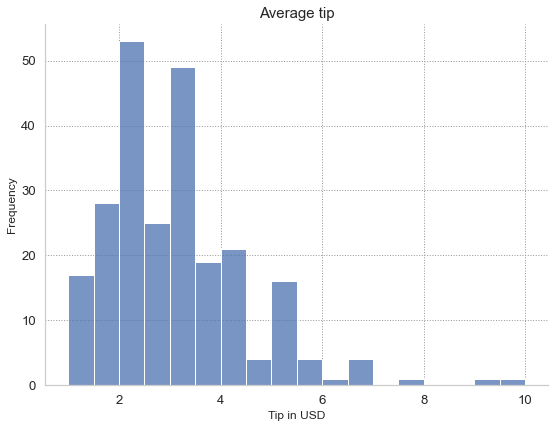

The average tip is: 2.998 USD and the standard deviation is: 1.384


In [31]:
x = df.tip.mean()
x = round(x, 3)

y = df.tip.std()
y = round(y, 3)
 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
sns.displot(x='tip',data=df,height=6, aspect=8/6)

plt.title('Average tip', fontsize = 15)
plt.ylabel('Frequency',fontsize = 12)
plt.xlabel('Tip in USD', fontsize = 12)
plt.show()
print('The average tip is:',x,'USD and the standard deviation is:',y)

Interpretation: Normally clients tip around 3 USD and it's very special to tip more than 6 USD.

#### 4. Histogram of the relationship between tip percentage and sex

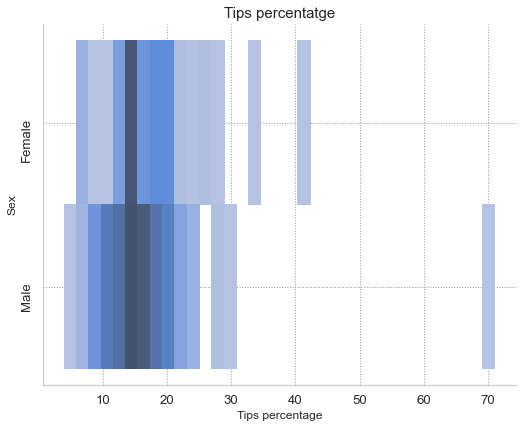

In [35]:
#Step1: Prepare some data
tips = df

#Step2: Control figure
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})

#Step3: Plot with Seaborn
sns.displot(x='tip_pct', y='sex',
            data=df,
            height=6, aspect=8/6)

plt.title('Tips percentatge', fontsize = 15)
plt.xlabel('Tips percentage', fontsize = 12)
plt.ylabel('Sex', fontsize = 12)
plt.yticks(rotation=90)
plt.show()

Interpretation: Male customers normally tip around 15% but the percentage varies more than in case of female customers. Male customers sometimes tip much more than female customers.

In [145]:
#Check if the previous calculation is correct
round((tips['tip']).describe(), 3)

count    244.000
mean       2.998
std        1.384
min        1.000
25%        2.000
50%        2.900
75%        3.562
max       10.000
Name: tip, dtype: float64

#### 5. Histogram showing the tips during the week

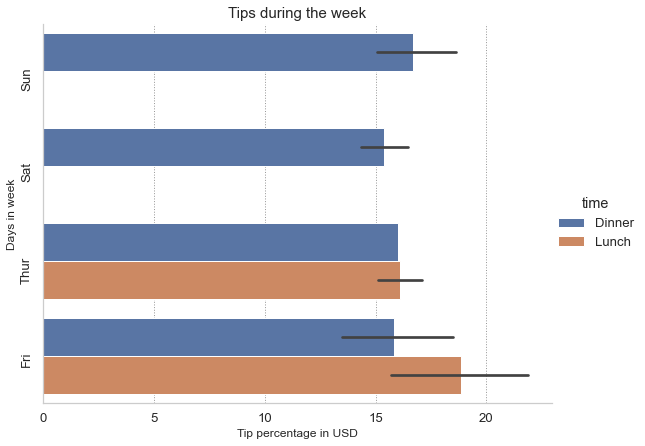

In [36]:
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})

sns.catplot(x='tip_pct', y='day',
            hue='time', data=df, orient='h',kind="bar", height=6, aspect=8/6)

plt.title('Tips during the week', fontsize = 15)
plt.ylabel('Days in week',fontsize = 12)
plt.xlabel('Tip percentage in USD', fontsize = 12)
plt.yticks(rotation=90)
plt.show()

Interpretation: The highest tips normally occur during Friday lunch time. My personal opinion is that it might happen because of specific location of the restaurant (some group of workers having lunch every Friday) or very good waiter who works during these hours in the restaurant.

#### 6. Tip average

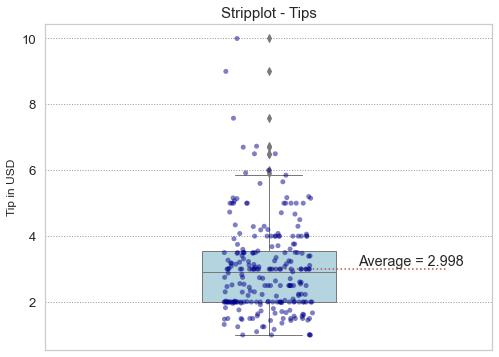

In [37]:
#Representation of tips - average
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize =(8, 6))
d = sns.boxplot(y="tip", data=df,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
d = sns.stripplot(y=df["tip"], orient='v', color='darkblue', alpha= 0.5)

media = x #Calucated in previous step

d.hlines(xmin=0,xmax=0.4, y=media, colors="r", linestyles="dotted")
d.annotate('Average = '+str(media), xy=(0,media), xytext=(0.2, 3.1))

plt.title('Stripplot - Tips', fontsize = 15)
plt.ylabel('Tip in USD',fontsize = 12)

plt.show(d)

#### 7. Total bill during the week

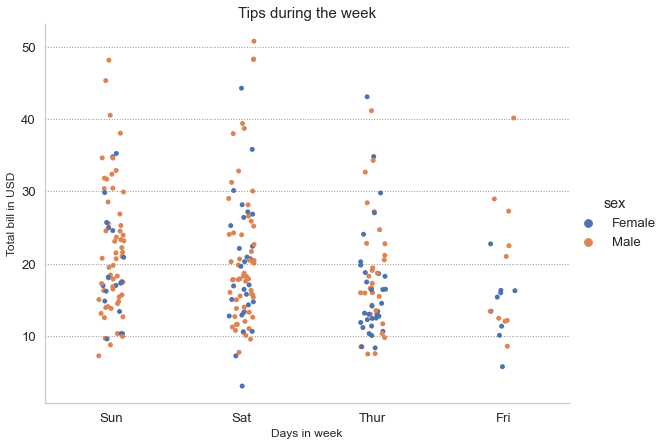

In [38]:
#Representation of more variables, total bill by female or male customers
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})

e = sns.catplot(x='day', y='total_bill', hue = 'sex', data=df, orient='v',height=6, aspect=8/6)

plt.title('Tips during the week', fontsize = 15)
plt.xlabel('Days in week', fontsize = 12)
plt.ylabel('Total bill in USD', fontsize = 12)
#plt.savefig('first.png')
plt.show(e)

Interpretation: Who spends the most? Usually it's male customer. That means that the restaurant show care about having dishes popular among male customer. Another interesting information is that on Saturday the clients spend the most. If the restaurant wants to organize some special party, Saturday would be the best day.

## Nivell 2

### Execise 2 - Examining data

#### 1.Import of dataset

In [39]:
#Import and show some rows, use read_table and define name of columns because .dat is not table
df = pd.read_table('movies.dat', sep='::', names=['Id', 'Title','Genders'], engine='python')
df.head(4)

,Id,Title,Genders
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama


In [6]:
#How big is the database? Do I have some missing values?
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genders  3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
Id         0
Title      0
Genders    0
dtype: int64


The dataset needs some cleaning: seperate columns for year and gendres. There arou no nan values.

#### 2. Create new columns for genders

In [40]:
#First let's make a list of all values of gender and than keep only unique values
all_genders = []
all_genders

for x in df.Genders:
    all_genders.extend(x.split('|'))
    
all_genders = pd.unique(all_genders)
len(all_genders)#Number of genders

18

In [41]:
#Create an array of 0 - like a template, than populate with values 1 or 0
arr = np.zeros((len(df), len(all_genders)))
dummies = pd.DataFrame(arr, columns = all_genders)
dummies.head()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#Iteration
gen = df.Genders[0]

for i, gen in enumerate(df.Genders):
    indexes = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indexes] = 1
dummies.head()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
#Combine dummies with movies
movies = df.join(dummies)
movies.head()

,Id,Title,Genders,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 3. Create new column for year

In [45]:
a = movies.Title.str.extract('(\d{4})')
movies['Year'] = a

pattern = r" +\(.*\)"
movies["Title"] = movies["Title"].apply(lambda x: re.sub(pattern, "", x))
movies.tail()

,Id,Title,Genders,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,...,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,Year
3878,3948,Meet the Parents,Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000
3879,3949,Requiem for a Dream,Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000
3880,3950,Tigerland,Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000
3881,3951,Two Family House,Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000
3882,3952,"Contender, The",Drama|Thriller,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000


In [46]:
#change object to int
movies['Year'] = movies['Year'].astype(int)

In [47]:
#checking if all years are relevant
movies.sort_values(by=['Year'], ascending=True, inplace=True)
movies.head()

,Id,Title,Genders,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,...,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,Year
1398,1422,Murder at 1600,Mystery|Thriller,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1600
2622,2691,"Legend of 1900, The",Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900
3063,3132,Daddy Long Legs,Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1919
2752,2821,Male and Female,Adventure|Drama,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1919
2754,2823,"Spiders, The",Action|Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1919


In [49]:
movies.tail()

,Id,Title,Genders,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,...,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,Year
912,924,2001: A Space Odyssey,Drama|Mystery|Sci-Fi|Thriller,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2001
2242,2311,2010,Mystery|Sci-Fi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2010
665,671,Mystery Science Theater 3000: The Movie,Comedy|Sci-Fi,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3000
3775,3845,And God Created Woman,Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8230
2239,2308,Detroit 9000,Action|Crime,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9000


Year 1600, 3000, 8230, 9000 is irrelevant, let's change the values.

In [50]:
movies['Year'].replace({1600: 1997}, inplace=True)
movies['Year'].replace({3000: 1996}, inplace=True)
movies['Year'].replace({8230: 1956}, inplace=True)
movies['Year'].replace({9000: 1973}, inplace=True)
movies.tail()

,Id,Title,Genders,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,...,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,Year
912,924,2001: A Space Odyssey,Drama|Mystery|Sci-Fi|Thriller,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2001
2242,2311,2010,Mystery|Sci-Fi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2010
665,671,Mystery Science Theater 3000: The Movie,Comedy|Sci-Fi,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1996
3775,3845,And God Created Woman,Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1956
2239,2308,Detroit 9000,Action|Crime,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1973


In [51]:
movies.sort_values(by=['Id'], ascending=True, inplace=True)
movies.head()

,Id,Title,Genders,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,...,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,Year
0,1,Toy Story,Animation|Children's|Comedy,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
1,2,Jumanji,Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
2,3,Grumpier Old Men,Comedy|Romance,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
3,4,Waiting to Exhale,Comedy|Drama,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
4,5,Father of the Bride Part II,Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995


#### 4. Number of movies by year

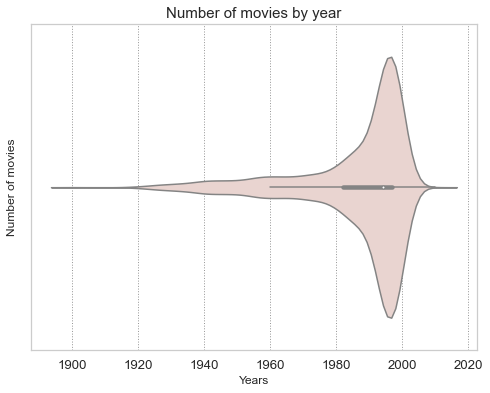

The oldest movie is from year: 1900
The newest movie is from year: 2010


In [52]:
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})

plt.figure(figsize =(8, 6))
f = sns.violinplot(x = 'Year', data = movies, palette="ch:3")

plt.title('Number of movies by year', fontsize = 15)
plt.xlabel('Years', fontsize = 12)
plt.ylabel('Number of movies', fontsize = 12)

plt.show(f)

y = movies['Year'].min()
z = movies['Year'].max()
print('The oldest movie is from year:',y)
print('The newest movie is from year:',z)

#### 5. Frequency of movies by year

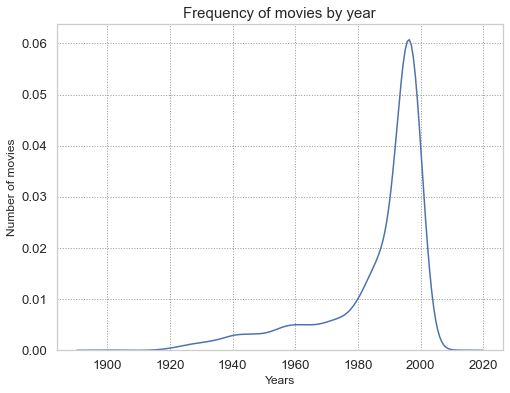

In [54]:
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})

plt.figure(figsize =(8, 6))
g = sns.kdeplot(x = 'Year', data = movies)

plt.title('Frequency of movies by year', fontsize = 15)
plt.xlabel('Years', fontsize = 12)
plt.ylabel('Number of movies', fontsize = 12)

plt.show(g)

In [55]:
q = movies['Year'].quantile([.25, .5, .75])
q25 = q[0.25].astype(int)
q50 = q[0.50].astype(int)
q75 = q[0.75].astype(int)
print(q25, q50, q75)

1982 1994 1997


First quartile limit is year 1982, third quartile limit is year 1997.

#### 6. One movie gender by years

In [56]:
#First prepare some data
var = movies.groupby('Year').sum()
first_df = pd.Series(var['Animation'], name='Total Animation')
first_df.to_frame()
first_df = first_df.reset_index()
first_df.head()

,Year,Total Animation
0,1900,0.0
1,1919,0.0
2,1920,0.0
3,1921,0.0
4,1922,0.0


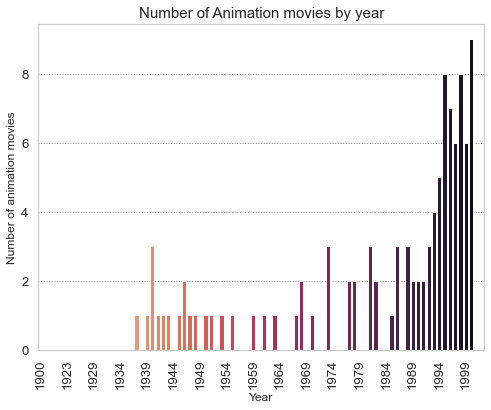

In [59]:
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize =(8, 6))

j = sns.barplot(x=first_df["Year"], y=first_df["Total Animation"], data = first_df,palette="rocket_r")
for index, label in enumerate(j.get_xticklabels()):
    if index % 5 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.title('Number of Animation movies by year', fontsize = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of animation movies', fontsize = 12)
plt.xticks(rotation=90)
plt.show(j)

Interpretation: Number of animation movies started to increase around year 1990.

#### 7. Movies comparison

In [60]:
#I will compare Animation with Comedy
second_df = pd.Series(var['Comedy'], name='Total Comedy')
second_df.to_frame()
second_df = second_df.reset_index()
second_df.head()

,Year,Total Comedy
0,1900,0.0
1,1919,1.0
2,1920,2.0
3,1921,0.0
4,1922,0.0


In [61]:
var2 = movies.groupby('Year').count()
third_df = pd.Series(var2['Id'], name='Total movies')
third_df.to_frame()
third_df = third_df.reset_index()
third_df.head()

,Year,Total movies
0,1900,1
1,1919,3
2,1920,2
3,1921,1
4,1922,2


In [62]:
test_df = first_df.join(second_df['Total Comedy'])
test_df = test_df.join(third_df['Total movies'])
test_df.head()

,Year,Total Animation,Total Comedy,Total movies
0,1900,0.0,0.0,1
1,1919,0.0,1.0,3
2,1920,0.0,2.0,2
3,1921,0.0,0.0,1
4,1922,0.0,0.0,2


In [63]:
print (test_df)

    Year  Total Animation  Total Comedy  Total movies
0   1900              0.0           0.0             1
1   1919              0.0           1.0             3
2   1920              0.0           2.0             2
3   1921              0.0           0.0             1
4   1922              0.0           0.0             2
..   ...              ...           ...           ...
79  1998              8.0         111.0           335
80  1999              6.0         103.0           281
81  2000              9.0          71.0           160
82  2001              0.0           0.0             1
83  2010              0.0           0.0             1

[84 rows x 4 columns]


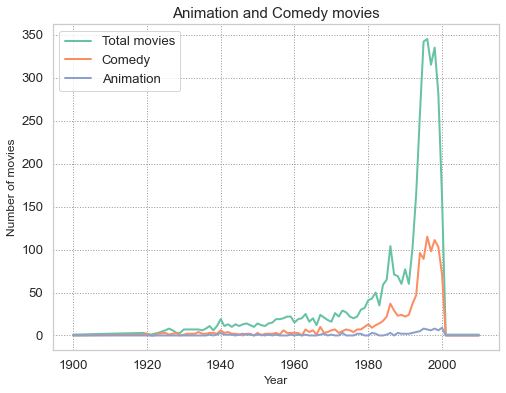

In [64]:
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette(palette="Set2")
plt.figure(figsize =(8, 6))

sns.lineplot(data=test_df, x='Year', y='Total movies', label='Total movies', lw=2)
sns.lineplot(data=test_df, x='Year', y='Total Comedy', label='Comedy', lw=2)
sns.lineplot(data=test_df, x='Year', y='Total Animation', label='Animation',lw=2)

plt.title('Animation and Comedy movies', fontsize = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of movies', fontsize = 12)

plt.show()

Interpretation: Number of Comedy movies is much more higher than Animation movies.

## Nivell 3

### Execise 3 - Creativity with dataset

In [65]:
extra_df = test_df.copy()
indexNames = extra_df[extra_df['Total Comedy'] == 0.0 ].index
extra_df.drop(indexNames, inplace=True)
extra_df.drop('Total Animation', inplace=True, axis=1)
extra_df['Total Comedy'] = extra_df['Total Comedy'].astype(int)
extra_df

,Year,Total Comedy,Total movies
1,1919,1,3
2,1920,2,2
5,1923,2,3
6,1925,3,6
7,1926,1,8
...,...,...,...
77,1996,115,345
78,1997,98,315
79,1998,111,335
80,1999,103,281


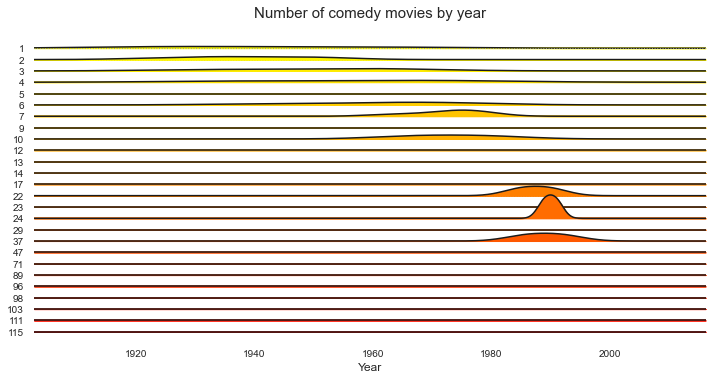

In [67]:
fig, axes = joypy.joyplot(extra_df,column=['Year'],by=['Total Comedy'], grid='y',
                          figsize=(10,5),overlap=0.5,colormap=cm.autumn_r)

plt.title('Number of comedy movies by year', fontsize = 15)
plt.xlabel('Year', fontsize = 12)

plt.show()

Interpretation: The histogram shows the density of comedy movies by years. The interesting thing is that around 1990 we can observe a higher density of total comedy movies. Now, let's explore some data with Treemap. First we will get a database with columns of gender.

In [68]:
genders_df = movies[['Animation',"Children's",'Comedy','Adventure','Fantasy','Romance','Drama',
                         'Action', 'Crime', 'Thriller', 'Horror','Sci-Fi', 'Documentary',
                         'War', 'Musical', 'Mystery', 'Film-Noir','Western']]
genders_df = genders_df.reset_index()
genders_df.drop('index', inplace=True, axis=1)
genders_df.head()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
gendersTotal_df = genders_df.sum()
gendersTotal_df.to_frame()
gendersTotal_df = gendersTotal_df.reset_index()
gendersTotal_df.head()

,index,0
0,Animation,105.0
1,Children's,251.0
2,Comedy,1200.0
3,Adventure,283.0
4,Fantasy,68.0


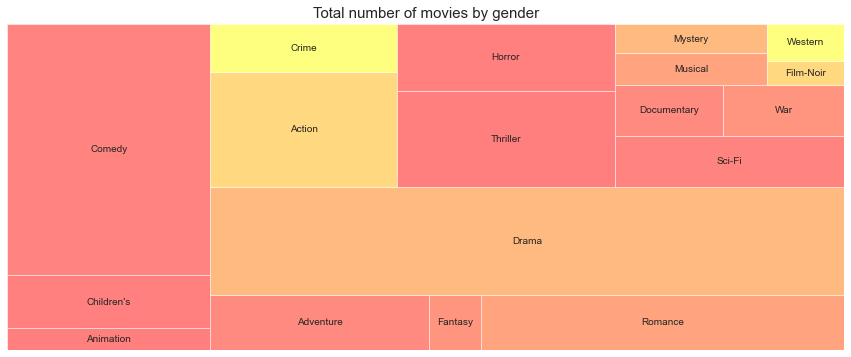

In [73]:
plt.figure(figsize =(15, 6))

my_values=[i**3 for i in range(1,10)]
cmap = matplotlib.cm.autumn
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]

squarify.plot(sizes=gendersTotal_df[0],label=gendersTotal_df['index'], alpha=.5, color=colors )
plt.axis('off')
plt.title('Total number of movies by gender', fontsize = 15)
plt.show()

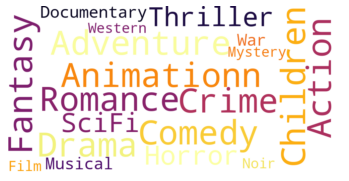

In [76]:
text = ('Animationn Children Comedy Adventure Fantasy Romance Drama Action Crime Thriller Horror SciFi Documentary War Musical Mystery Film-Noir Western')

wordcloud = WordCloud(width=1000, height=500, margin=0,background_color="white",colormap="inferno",max_font_size=100, min_font_size=30).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

* Notes:
    - Color gallery: https://matplotlib.org/stable/tutorials/colors/colormaps.html 
    - https://www.datacamp.com/community/tutorials/wordcloud-python